In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
telecom_df = pd.read_csv('train.csv/train.csv')
test_df = pd.read_csv('test/test.csv')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
i_rows,i_cols = telecom_df.shape

In [4]:
telecom_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [5]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8']

In [6]:
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
telecom_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [9]:
telecom_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [10]:
## Drop columns where only one value is there or different value exists for every row.
unique_cols = ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
               'last_date_of_month_7','last_date_of_month_8',
               'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
               'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']

telecom_df.drop(unique_cols,axis=1,inplace=True)
test_df.drop(unique_cols,axis=1,inplace=True)

In [11]:
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8']

In [12]:
for col in date_cols:
    telecom_df[col]=pd.to_datetime(telecom_df[col])
    test_df[col]=pd.to_datetime(test_df[col])
    

In [13]:
## Days since last recharge, if null value fill it with 90
def fill_days_since_rech_data(row):
    d1 = datetime(2014,8,31,0,0)
    if(not (pd.isna(row['date_of_last_rech_data_8']))):
        return (d1-row['date_of_last_rech_data_8'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_data_7']))):
        return (d1-row['date_of_last_rech_data_7'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_data_6']))):
        return (d1-row['date_of_last_rech_data_6'].to_pydatetime()).days
    
    return 90

In [14]:
## Days since last recharge, if null value fill it with 90
def fill_days_since_rech(row):
    d1 = datetime(2014,8,31,0,0)
    if(not (pd.isna(row['date_of_last_rech_8']))):
        return (d1-row['date_of_last_rech_8'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_7']))):
        return (d1-row['date_of_last_rech_7'].to_pydatetime()).days
    elif(not (pd.isna(row['date_of_last_rech_6']))):
        return (d1-row['date_of_last_rech_6'].to_pydatetime()).days
    
    return 90

In [15]:
telecom_df['days_since_last_rech_data'] = telecom_df.apply(lambda row:fill_days_since_rech_data(row),axis=1)
test_df['days_since_last_rech_data'] = test_df.apply(lambda row:fill_days_since_rech_data(row),axis=1)

In [16]:
telecom_df['days_since_last_rech'] = telecom_df.apply(lambda row:fill_days_since_rech(row),axis=1)
test_df['days_since_last_rech'] = test_df.apply(lambda row:fill_days_since_rech(row),axis=1)

In [17]:
telecom_df.drop(['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6',
        'date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)
test_df.drop(['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6',
        'date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)

In [18]:
telecom_df.filter(regex='_6|_7|_8').fillna(0)
col_list = telecom_df.filter(regex='_6|_7|_8').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g',
       'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'fb_user'],
      dtype='object')

In [19]:
for col in col_list.unique():
    avg_col = "avg_d_"+col
    col_6= col+"_6"
    col_7= col+"_7"
    telecom_df[avg_col]= (telecom_df[col_6]+telecom_df[col_7])/2
    test_df[avg_col]= (test_df[col_6]+test_df[col_7])/2
    

In [20]:
drop_cols = telecom_df.filter(regex='_6|_7').columns
telecom_df.drop(drop_cols,axis=1,inplace=True)
test_df.drop(drop_cols,axis=1,inplace=True)

In [21]:
telecom_df['avg_vbc_3g']=(telecom_df['jul_vbc_3g']+telecom_df['jun_vbc_3g'])/2
test_df['avg_vbc_3g']=(test_df['jul_vbc_3g']+test_df['jun_vbc_3g'])/2


In [22]:
telecom_df.drop(['jul_vbc_3g','jun_vbc_3g'],axis=1,inplace=True)
test_df.drop(['jul_vbc_3g','jun_vbc_3g'],axis=1,inplace=True)

In [23]:
telecom_df.shape

(69999, 104)

In [24]:
cat_cols = ['avg_d_fb_user','avg_d_night_pck_user']
for col in cat_cols:
    telecom_df[col].fillna(-1,inplace=True)
    test_df[col].fillna(-1,inplace=True)

In [25]:
### Drop skewed columns

In [26]:
column_skewed = []
cols = telecom_df.select_dtypes(include='object').columns
for col in cols:
    if(telecom_df[col].value_counts().max() >= (0.95*telecom_df.shape[0])):
        column_skewed.append(col)
telecom_df.drop(column_skewed,axis=1,inplace=True)
test_df.drop(column_skewed,axis=1,inplace=True)
print("Columns getting dropped because of skewness in the the data:",column_skewed)

Columns getting dropped because of skewness in the the data: []


In [27]:
#### Pairwise - Correlation between columns and removing based on that.. 

<AxesSubplot:>

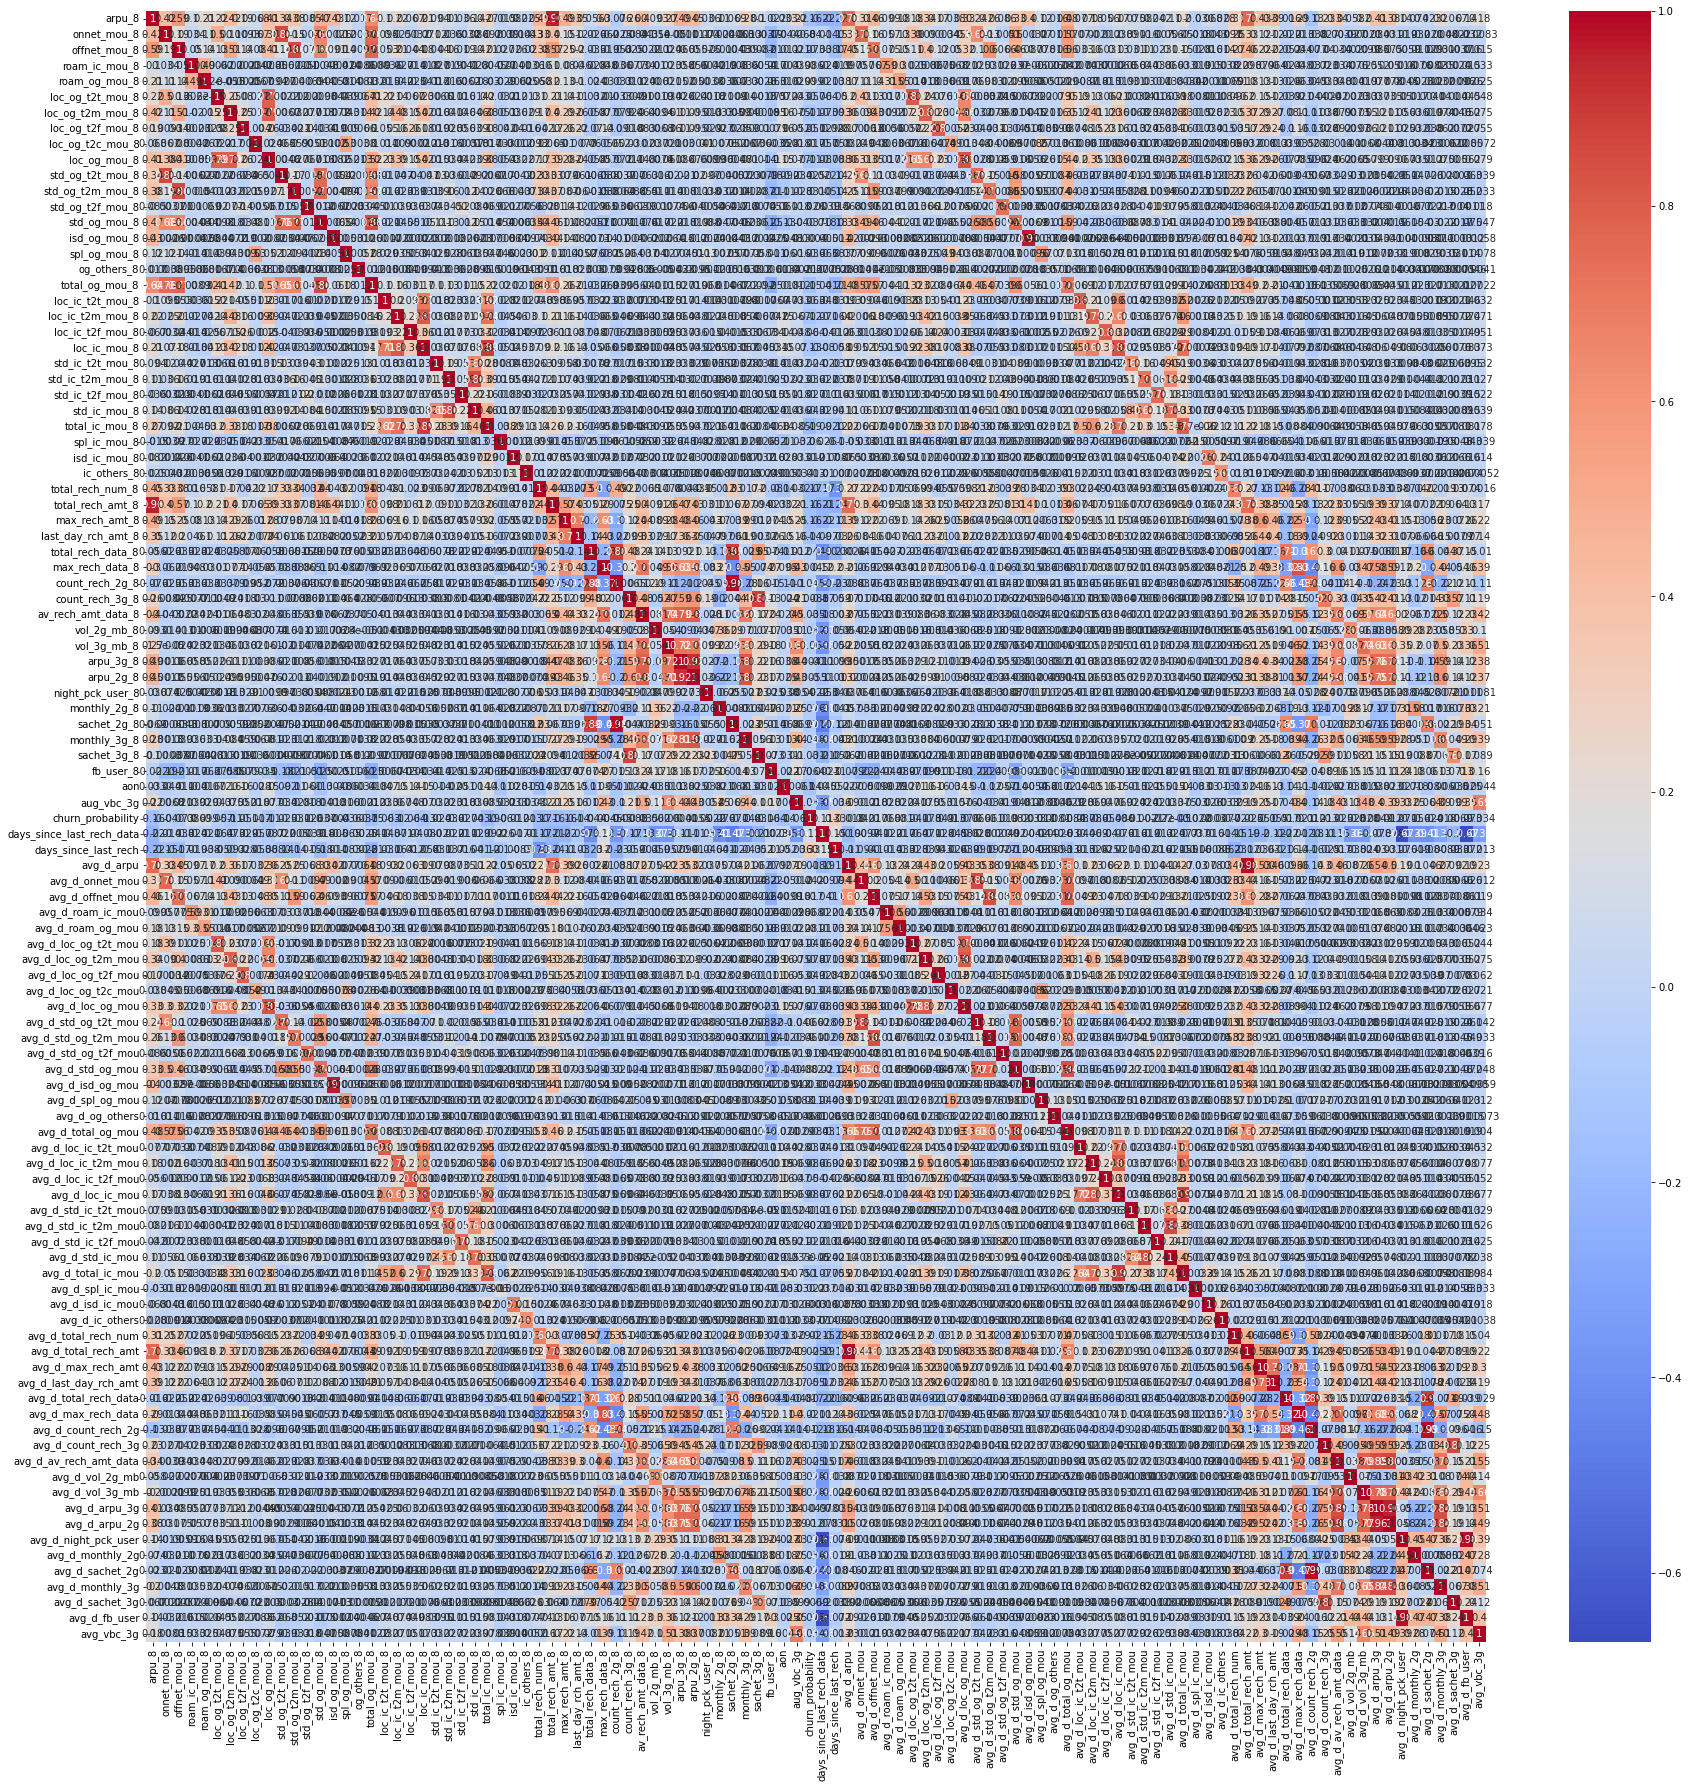

In [28]:
corr_mat = telecom_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

In [29]:
def get_redundant_pairs(s):
    '''Get correlation with same pairs remove the values'''
    pairs_to_drop = set()
    cols = s.keys()
    for k1,k2 in cols:
        if(k1==k2):
            pairs_to_drop.add((k1,k2))
    return pairs_to_drop

def get_top_abs_correlations(df, c=0.8):
    corr = df.corr()
    corr_1= corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))
    au_corr = corr_1.stack()
    #print(set(au_corr.index.get_level_values(1)))
    #au_corr[abs(au_corr)>c].to_csv("corr.csv")
    #au_corr = df.corr().abs().unstack()
    #labels_to_drop = get_redundant_pairs(au_corr)
    #au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[abs(au_corr)>c]


In [30]:
get_top_abs_correlations(telecom_df,c=0.7)

arpu_8                  total_rech_amt_8          0.958333
                        avg_d_arpu                0.764446
                        avg_d_total_rech_amt      0.768843
onnet_mou_8             std_og_t2t_mou_8          0.862759
                        total_og_mou_8            0.756311
                        avg_d_onnet_mou           0.764388
offnet_mou_8            std_og_t2m_mou_8          0.858002
                        total_og_mou_8            0.773046
                        avg_d_offnet_mou          0.734996
loc_og_t2t_mou_8        loc_og_mou_8              0.785726
                        avg_d_loc_og_t2t_mou      0.807468
loc_og_t2m_mou_8        loc_og_mou_8              0.792308
                        avg_d_loc_og_t2m_mou      0.803727
loc_og_t2f_mou_8        avg_d_loc_og_t2f_mou      0.799623
loc_og_mou_8            avg_d_loc_og_mou          0.830325
std_og_t2t_mou_8        std_og_mou_8              0.761291
                        avg_d_std_og_t2t_mou      0.7502

In [31]:
absCorrWithDep={}
y = telecom_df['churn_probability']
X = telecom_df

In [32]:
for col in telecom_df.columns:
    absCorrWithDep[col]=abs(y.corr(X[col]))

In [33]:
dict(sorted(absCorrWithDep.items(), key=lambda item: item[1],reverse=True))

{'churn_probability': 1.0,
 'days_since_last_rech': 0.3277557575279273,
 'total_ic_mou_8': 0.1875655404262014,
 'total_rech_num_8': 0.16704279049807114,
 'total_rech_amt_8': 0.16045479282815195,
 'max_rech_amt_8': 0.15913091605120128,
 'arpu_8': 0.15756638032324105,
 'total_og_mou_8': 0.14932534419555976,
 'last_day_rch_amt_8': 0.13961072163213034,
 'aon': 0.1351769299851386,
 'loc_ic_mou_8': 0.12878413667729902,
 'loc_ic_t2m_mou_8': 0.12484001968856372,
 'loc_og_t2m_mou_8': 0.11330884461236099,
 'days_since_last_rech_data': 0.11232761764649053,
 'loc_og_mou_8': 0.10882141368592474,
 'avg_d_total_ic_mou': 0.10142235529617168,
 'roam_og_mou_8': 0.09870286660181475,
 'avg_d_loc_ic_mou': 0.08612982135506335,
 'avg_d_loc_ic_t2m_mou': 0.086121621440663,
 'roam_ic_mou_8': 0.08576137400016291,
 'avg_d_std_og_mou': 0.08181307902215548,
 'avg_d_roam_og_mou': 0.08134939763312209,
 'avg_d_loc_og_t2m_mou': 0.07754509505444394,
 'avg_d_loc_og_mou': 0.07640677939086866,
 'monthly_2g_8': 0.0762543446

In [34]:
drop_cols =['avg_d_arpu','avg_d_offnet_mou','avg_d_loc_og_t2t_mou',
             'avg_d_loc_og_t2m_mou','avg_d_std_og_t2t_mou','avg_d_std_og_t2m_mou','avg_d_std_og_mou',
             'avg_d_loc_ic_t2t_mou','avg_d_loc_ic_t2m_mou','avg_d_loc_ic_mou','avg_d_std_ic_t2m_mou',
             'avg_d_max_rech_amt','avg_d_count_rech_2g','avg_d_av_rech_amt_data','avg_d_arpu_3g','avg_d_arpu_2g',
             'avg_d_total_og_mou','avg_d_max_rech_data','avg_d_sachet_3g','avg_d_total_rech_data','avg_d_night_pck_user']
#telecom_df.drop(drop_cols,axis=1,inplace=True)
#test_df.drop(drop_cols,axis=1,inplace=True)


In [35]:
telecom_df.info()
num_cols = list(telecom_df.columns)
num_cols.remove("churn_probability")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 104 entries, arpu_8 to avg_vbc_3g
dtypes: float64(92), int64(12)
memory usage: 55.5 MB


In [36]:
drop_cols =[]
missing_values_cols =[]
columns_to_impute = []
for col in num_cols:
        missing_percentage = telecom_df[col].isnull().sum()*100/telecom_df.shape[0]
        if(missing_percentage>90):
            drop_cols.append(col)
        else:
            columns_to_impute.append(col)
telecom_df.drop(drop_cols,axis=1,inplace=True)
test_df.drop(drop_cols,axis=1,inplace=True)
print("Columns that are going to be dropped are :",drop_cols)

Columns that are going to be dropped are : []


In [37]:
telecom_df.shape

(69999, 104)

In [38]:
for col in columns_to_impute:
    telecom_df[col].fillna(0,inplace=True)
    if col not  in ['churn_probability']:
        test_df[col].fillna(0,inplace=True)

In [39]:
telecom_df.isnull().sum()

arpu_8                       0
onnet_mou_8                  0
offnet_mou_8                 0
roam_ic_mou_8                0
roam_og_mou_8                0
loc_og_t2t_mou_8             0
loc_og_t2m_mou_8             0
loc_og_t2f_mou_8             0
loc_og_t2c_mou_8             0
loc_og_mou_8                 0
std_og_t2t_mou_8             0
std_og_t2m_mou_8             0
std_og_t2f_mou_8             0
std_og_mou_8                 0
isd_og_mou_8                 0
spl_og_mou_8                 0
og_others_8                  0
total_og_mou_8               0
loc_ic_t2t_mou_8             0
loc_ic_t2m_mou_8             0
loc_ic_t2f_mou_8             0
loc_ic_mou_8                 0
std_ic_t2t_mou_8             0
std_ic_t2m_mou_8             0
std_ic_t2f_mou_8             0
std_ic_mou_8                 0
total_ic_mou_8               0
spl_ic_mou_8                 0
isd_ic_mou_8                 0
ic_others_8                  0
total_rech_num_8             0
total_rech_amt_8             0
max_rech

In [40]:
absCorrWithDep={}
for col in telecom_df.columns:
    absCorrWithDep[col]=abs(y.corr(X[col]))

    

In [41]:
dict(sorted(absCorrWithDep.items(), key=lambda item: item[1],reverse=True))

{'churn_probability': 1.0,
 'days_since_last_rech': 0.3277557575279273,
 'total_ic_mou_8': 0.1875655404262014,
 'loc_ic_mou_8': 0.18208490950908776,
 'loc_ic_t2m_mou_8': 0.17671842041972433,
 'total_rech_num_8': 0.16704279049807114,
 'loc_og_t2m_mou_8': 0.16129910175399217,
 'total_rech_amt_8': 0.16045479282815195,
 'max_rech_amt_8': 0.15913091605120128,
 'arpu_8': 0.15756638032324105,
 'loc_og_mou_8': 0.15509161348355552,
 'total_og_mou_8': 0.14932534419555976,
 'last_day_rch_amt_8': 0.13961072163213034,
 'aon': 0.1351769299851386,
 'fb_user_8': 0.13209608179970447,
 'offnet_mou_8': 0.13101235957762533,
 'avg_d_loc_ic_mou': 0.11953272119505094,
 'avg_d_loc_ic_t2m_mou': 0.1184785964841812,
 'days_since_last_rech_data': 0.11232761764649053,
 'avg_d_loc_og_t2m_mou': 0.1071254324771502,
 'avg_d_loc_og_mou': 0.10518997496941127,
 'avg_d_total_ic_mou': 0.10142235529617168,
 'av_rech_amt_data_8': 0.0969726521690727,
 'max_rech_data_8': 0.0953884232200995,
 'loc_ic_t2t_mou_8': 0.0906550313926

In [42]:
high_corr_cols = ['days_since_last_rech','avg_d_loc_og_mou','aon','avg_d_total_ic_mou','days_since_last_rech_data']

In [43]:
corr_mat = telecom_df.corr()
plt.figure(figsize=(30,30))
#sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

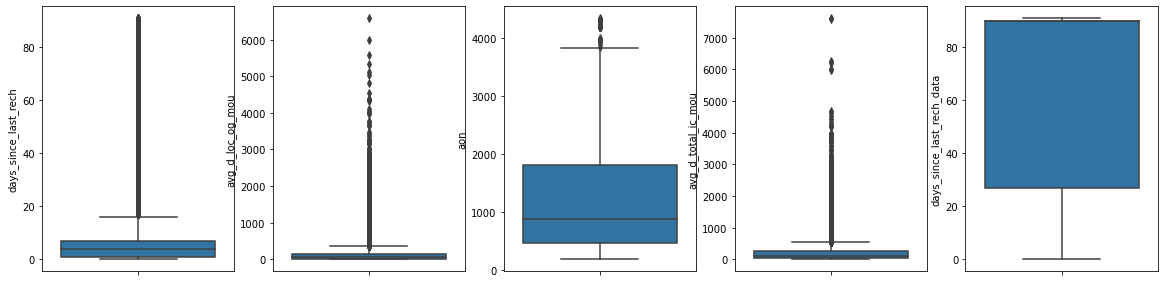

In [44]:
plt.figure(figsize=(20,40))
i =1
## Distribution of the variables

for col in high_corr_cols:
    plt.subplot(7,5,i)
    sns.boxplot(y=col,data=telecom_df)
    i= i +1

In [45]:
def remove_outlier(df,col):
    i_rows,i_cols = df.shape
    Q1=df[col].quantile(0.20)
    Q3= df[col].quantile(0.90)
    IQR = Q3-Q1
    df= df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
    f_rows,f_cols = df.shape
    print('{} outliers has been removed in {}'.format(i_rows-f_rows,col))
    return df

In [46]:
#for col in high_corr_cols:
#    telecom_df = remove_outlier(telecom_df,col)
#    test_df= remove_outlier(test_df,col)

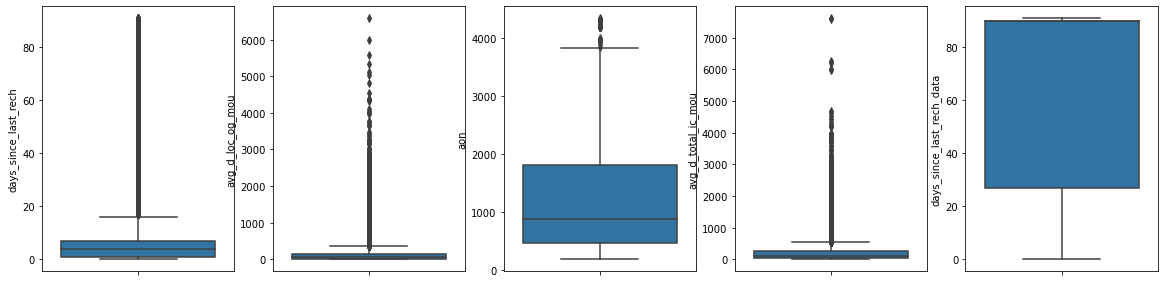

In [47]:
plt.figure(figsize=(20,40))
i =1
## Distribution of the variables
for col in high_corr_cols:
    plt.subplot(7,5,i)
    sns.boxplot(y=col,data=telecom_df)
    i= i +1

In [48]:
f_rows,f_cols = telecom_df.shape
print("Row dropped during processing:",(i_rows-f_rows))
print("Columns dropped during processing:",(i_cols-f_cols))

Row dropped during processing: 0
Columns dropped during processing: 68


In [49]:
#### Converting to categorical features

In [50]:
cat_cols = ['avg_d_fb_user']
for col in cat_cols:
    cat_df = pd.get_dummies(telecom_df[col],prefix=col+"_",drop_first=True)
    telecom_df = pd.concat([telecom_df,cat_df],axis=1)
    cat_df1 = pd.get_dummies(test_df[col],prefix=col+"_",drop_first=True)
    test_df = pd.concat([test_df,cat_df1],axis=1)

In [51]:
telecom_df.shape

(69999, 107)

In [52]:
test_df.shape

(30000, 106)

In [53]:
y=telecom_df.pop('churn_probability')

In [54]:
X= telecom_df

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(telecom_df,y, train_size=0.7,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_kaggle = scaler.transform(test_df)

In [56]:
## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [59]:
%%time
rf.fit(X_train, y_train)

Wall time: 1.07 s


C:\Users\idhay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [60]:
rf.oob_score_

0.9379579175085205

In [61]:
y_test_rf=rf.predict(X_test)

In [62]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report,accuracy_score

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


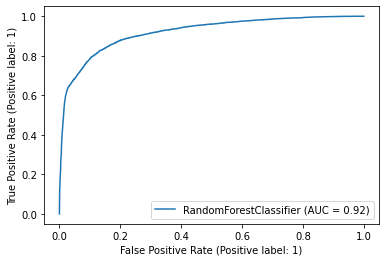

In [63]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [64]:
confusion_matrix(y_test,y_test_rf)

array([[18516,   329],
       [  912,  1243]], dtype=int64)

In [65]:
precision_score(y_test,y_test_rf)

0.7907124681933843

In [66]:
### Hyper parameter tuning for random forest

In [67]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [68]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [50, 100]
}

In [69]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [70]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=1)

In [71]:
grid_search.best_score_

0.9421008562131685

In [72]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [73]:
y_test_rf=rf_best.predict(X_test)
y_test_kaggle=rf_best.predict(X_test_kaggle)

In [74]:
pd.DataFrame(data=y_test_kaggle).to_csv("Submit.csv")

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


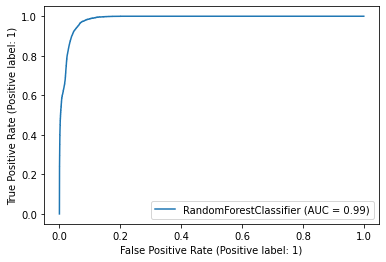

In [75]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [76]:
imp_df = pd.DataFrame({
     "Varname": telecom_df.columns,
     "Imp": rf_best.feature_importances_
})

In [77]:
precision_score(y_test,y_test_rf)

0.7767220902612827

In [78]:
recall_score(y_test,y_test_rf)

0.6069605568445475

In [79]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.78      0.61      0.68      2155

    accuracy                           0.94     21000
   macro avg       0.87      0.79      0.82     21000
weighted avg       0.94      0.94      0.94     21000



In [80]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
21                loc_ic_mou_8  0.139282
26              total_ic_mou_8  0.129048
19            loc_ic_t2m_mou_8  0.068827
9                 loc_og_mou_8  0.058757
2                 offnet_mou_8  0.041023
6             loc_og_t2m_mou_8  0.040179
17              total_og_mou_8  0.037708
18            loc_ic_t2t_mou_8  0.033535
33          last_day_rch_amt_8  0.027146
0                       arpu_8  0.024586
31            total_rech_amt_8  0.024067
5             loc_og_t2t_mou_8  0.017004
52        days_since_last_rech  0.016678
4                roam_og_mou_8  0.015599
3                roam_ic_mou_8  0.012952
23            std_ic_t2m_mou_8  0.011803
25                std_ic_mou_8  0.011600
32              max_rech_amt_8  0.011481
1                  onnet_mou_8  0.011092
74            avg_d_loc_ic_mou  0.010298
51   days_since_last_rech_data  0.009411
35             max_rech_data_8  0.009160
20            loc_ic_t2f_mou_8  0.009103
79          avg_d_total_ic_mou  0.008657
30            total_rech_num_8  0.007995
49                         aon  0.007718
72        avg_d_loc_ic_t2m_mou  0.007680
70          avg_d_total_og_mou  0.007675
59        avg_d_loc_og_t2m_mou  0.007446
55            avg_d_offnet_mou  0.007407
83        avg_d_total_rech_num  0.007335
66            avg_d_std_og_mou  0.006832
53                  avg_d_arpu  0.006599
71        avg_d_loc_ic_t2t_mou  0.006406
84        avg_d_total_rech_amt  0.006198
62            avg_d_loc_og_mou  0.005925
34           total_rech_data_8  0.005866
10            std_og_t2t_mou_8  0.005816
57           avg_d_roam_og_mou  0.005734
54             avg_d_onnet_mou  0.005667
85          avg_d_max_rech_amt  0.005606
78            avg_d_std_ic_mou  0.004854
63        avg_d_std_og_t2t_mou  0.004589
64        avg_d_std_og_t2m_mou  0.004539
58        avg_d_loc_og_t2t_mou  0.004448
76        avg_d_std_ic_t2m_mou  0.004365
38          av_rech_amt_data_8  0.004335
11            std_og_t2m_mou_8  0.004262
56           avg_d_roam_ic_mou  0.004189
68            avg_d_spl_og_mou  0.004061
86      avg_d_last_day_rch_amt  0.004017
48                   fb_user_8  0.003975
75        avg_d_std_ic_t2t_mou  0.003622
73        avg_d_loc_ic_t2f_mou  0.003505
15                spl_og_mou_8  0.003373
40                 vol_3g_mb_8  0.003344
13                std_og_mou_8  0.003162
61        avg_d_loc_og_t2c_mou  0.002445
42                   arpu_2g_8  0.002441
60        avg_d_loc_og_t2f_mou  0.002097
7             loc_og_t2f_mou_8  0.002020
88         avg_d_max_rech_data  0.001936
39                 vol_2g_mb_8  0.001926
50                  aug_vbc_3g  0.001827
22            std_ic_t2t_mou_8  0.001816
92             avg_d_vol_2g_mb  0.001680
87       avg_d_total_rech_data  0.001651
93             avg_d_vol_3g_mb  0.001436
27                spl_ic_mou_8  0.001357
91      avg_d_av_rech_amt_data  0.001306
102                 avg_vbc_3g  0.001175
80            avg_d_spl_ic_mou  0.001084
82             avg_d_ic_others  0.001046
41                   arpu_3g_8  0.001045
95               avg_d_arpu_2g  0.001040
81            avg_d_isd_ic_mou  0.000979
69             avg_d_og_others  0.000910
77        avg_d_std_ic_t2f_mou  0.000909
24            std_ic_t2f_mou_8  0.000817
8             loc_og_t2c_mou_8  0.000802
101              avg_d_fb_user  0.000781
65        avg_d_std_og_t2f_mou  0.000753
96        avg_d_night_pck_user  0.000739
28                isd_ic_mou_8  0.000738
94               avg_d_arpu_3g  0.000700
98             avg_d_sachet_2g  0.000658
14                isd_og_mou_8  0.000616
67            avg_d_isd_og_mou  0.000430
105         avg_d_fb_user__1.0  0.000427
37             count_rech_3g_8  0.000364
89         avg_d_count_rech_2g  0.000349
36             count_rech_2g_8  0.000326
99            avg_d_monthly_3g  0.000305
29                 ic_others_8  0.000258
44                monthly_2g_8  0.000246
90         avg_d_count_rech_3g  0.000229
45                 sachet_2g_8  0.000221
97   

In [81]:
import xgboost as xgb

In [82]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [83]:
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
xgb_predictions_kaggle = xgb_cfl.predict(X_test_kaggle)

C:\Users\idhay\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
accuracy_score(y_test, xgb_predictions)

0.9405238095238095

In [96]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [500], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 10, 12]
        }

folds = 5

In [97]:
param_comb =500

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


In [88]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

 Best accuracy for 5-fold search with 100 parameter combinations:
0.9433866429519047

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [89]:
xgb_predictions_hpt = random_search.predict(X_test)
xgb_predictions_hpt_kaggle = random_search.predict(X_test_kaggle)
accuracy_score(y_test, xgb_predictions_hpt)

0.9413809523809524

In [93]:
confusion_matrix(y_test,xgb_predictions_hpt)

array([[18391,   454],
       [  777,  1378]], dtype=int64)

In [95]:
print(classification_report(y_test,xgb_predictions_hpt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.75      0.64      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000



In [92]:
pd.DataFrame(xgb_predictions_hpt_kaggle).to_csv("Submit_XG_Boost.csv")